In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import  tensorflow as tf
import tensorflow.keras as k
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt 
import pickle
import os 

In [3]:
path="/kaggle/input/real-doppler-raddar-database/data/"
car=[]
x=[]
y=[]
file=os.listdir(path+'Cars/')
#print(file)
for i in file:
    f=os.listdir(path+'Cars/'+i)
    for j in f:
        p=pd.read_csv(path+"Cars/"+i+"/"+j,header=None)
        p=p.to_numpy()
        car.append(p)
        x.append(p)
        d=[1,0]
        y.append(d)
print("done car")
drone=[]
file=os.listdir(path+'Drones/')
for i in file:
    f=os.listdir(path+'Drones/'+i)
    for j in f:
        p=pd.read_csv(path+"Drones/"+i+"/"+j,header=None)
        p=p.to_numpy()
        drone.append(p)
        x.append(p)
        d=[0,1]
        y.append(d)
print("done drone")        
people=[]
file=os.listdir(path+'People/')
for i in file:
    f=os.listdir(path+'People/'+i)
    for j in f:
        p=pd.read_csv(path+"People/"+i+"/"+j,header=None)
        p=p.to_numpy()
        people.append(p)
        x.append(p)
        d=[1,0]
        y.append(d)
print("done people")

done car
done drone
done people


In [4]:
r=np.save('input',x)

In [5]:
s=np.save('ground tooth',y)

In [6]:
x=np.absolute(x)


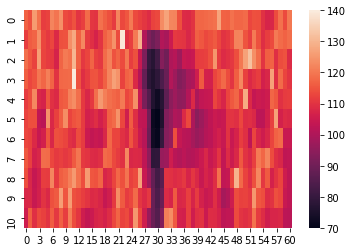

In [7]:
car=np.asarray(car)
np.shape(car)
car=np.absolute(car)
drone=np.absolute(drone)
people=np.absolute(people)
import seaborn as sns
ax = sns.heatmap(car[600],vmin=70,vmax=140)

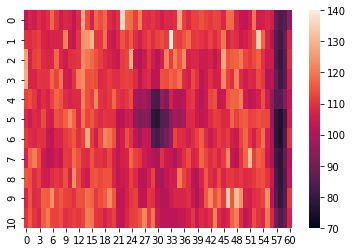

In [8]:
ay=sns.heatmap(people[500],vmin=70,vmax=140)

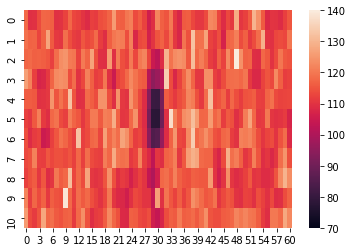

In [9]:
ay=sns.heatmap(drone[500],vmin=70,vmax=140)

In [10]:
np.shape(x)

(17485, 11, 61)

In [11]:
np.shape(y)

(17485, 2)

In [12]:
print(y[0])

[1, 0]


In [13]:
 from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.125, random_state=42)


In [14]:
x_train=np.asarray(x_train)
y_train=np.asarray(y_train)
x_test=np.asarray(x_test)
y_test=np.asarray(y_test)
x_val=np.asarray(x_val)
y_val=np.asarray(y_val)
x_train=np.reshape(x_train,[-1,11,61,1])
x_test=np.reshape(x_test,[-1,11,61,1])
x_val=np.reshape(x_val,[-1,11,61,1])


In [15]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(12239, 11, 61, 1)
(1749, 11, 61, 1)
(3497, 11, 61, 1)


In [34]:
model = k.Sequential()
model.add(tf.keras.Input(shape=(11, 61, 1)))

# 1st Block: Convolution + BatchNorm + MaxPooling
model.add(k.layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(k.layers.BatchNormalization())
model.add(k.layers.MaxPooling2D(pool_size=(2, 2)))  # Reduces dimensionality

# 2nd Block: Convolution + BatchNorm + MaxPooling
model.add(k.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(k.layers.BatchNormalization())
model.add(k.layers.MaxPooling2D(pool_size=(2, 2)))

# 3rd Block: Convolution + BatchNorm
model.add(k.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(k.layers.BatchNormalization())

# Flatten before Dense layers
model.add(k.layers.Flatten())

# Fully Connected Layers + Dropout
model.add(k.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(k.layers.Dropout(0.5))

model.add(k.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(k.layers.Dropout(0.3))

# Output Layer
model.add(k.layers.Dense(2, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'], )

print(model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 11, 61, 32)        320       
_________________________________________________________________
batch_normalization_6 (Batch (None, 11, 61, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 30, 32)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 5, 30, 64)         18496     
_________________________________________________________________
batch_normalization_7 (Batch (None, 5, 30, 64)         256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 15, 64)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 2, 15, 128)       

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_val, y_val), callbacks=[early_stopping])

Epoch 1/50
383/383 [==============================] - 1s 4ms/step - loss: 0.0910 - accuracy: 0.9752 - val_loss: 0.3616 - val_accuracy: 0.8988
Epoch 2/50
383/383 [==============================] - 1s 3ms/step - loss: 0.0929 - accuracy: 0.9765 - val_loss: 0.2385 - val_accuracy: 0.9131
Epoch 3/50
383/383 [==============================] - 1s 3ms/step - loss: 0.0864 - accuracy: 0.9782 - val_loss: 0.2784 - val_accuracy: 0.9314
Epoch 4/50
383/383 [==============================] - 1s 3ms/step - loss: 0.0859 - accuracy: 0.9789 - val_loss: 0.3481 - val_accuracy: 0.8902
Epoch 5/50
383/383 [==============================] - 1s 3ms/step - loss: 0.0860 - accuracy: 0.9783 - val_loss: 0.3692 - val_accuracy: 0.8816
Epoch 6/50
383/383 [==============================] - 1s 3ms/step - loss: 0.0817 - accuracy: 0.9810 - val_loss: 0.7485 - val_accuracy: 0.8491
Epoch 7/50
287/383 [=====================>........] - ETA: 0s - loss: 0.0763 - accuracy: 0.9837

In [45]:
# Training and validation loss and accuracy
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


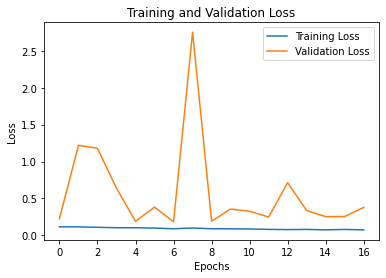

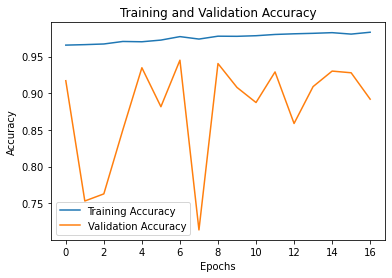

In [46]:
import matplotlib.pyplot as plt

# Plot the loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accuracy curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [47]:
history.model.evaluate(x_test,y_test)

110/110 [==============================] - 0s 2ms/step - loss: 0.1635 - accuracy: 0.9477


[0.16347551345825195, 0.9476694464683533]

In [21]:
y_pred=history.model.predict(x_test)

In [22]:
def predict(x):
    x=np.reshape(x,[-1,11,61,1])
    z=history.model.predict(x)
    z=z.round()
    
    return z

In [23]:
history.model.predict(x_test)

array([[1.0000000e+00, 1.1636297e-12],
       [1.0000000e+00, 2.3084723e-15],
       [9.9990904e-01, 9.0977475e-05],
       ...,
       [1.0000000e+00, 4.7735411e-28],
       [1.0000000e+00, 1.3919646e-13],
       [9.9999714e-01, 2.8791164e-06]], dtype=float32)

In [24]:
y_pred

array([[1.0000000e+00, 1.1636297e-12],
       [1.0000000e+00, 2.3084723e-15],
       [9.9990904e-01, 9.0977475e-05],
       ...,
       [1.0000000e+00, 4.7735411e-28],
       [1.0000000e+00, 1.3919646e-13],
       [9.9999714e-01, 2.8791164e-06]], dtype=float32)

In [25]:
#print(model.trainable_variables)

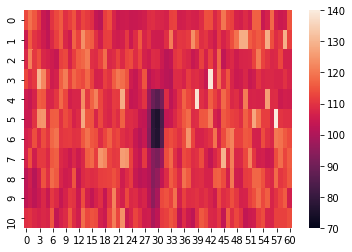

In [26]:
ay=sns.heatmap(x[100],vmin=70,vmax=140)

In [27]:
pred=history.model.predict(np.reshape(x[100],[1,11,61,1]))

In [28]:
pred.round()

array([[1., 0.]], dtype=float32)

In [29]:
y[100]

[1, 0]